In [377]:
import pandas as pd
import numpy as np

columns = ['age','workclass','temp','education','edunum','maritalstatus',
           'occupation','relationship','race','sex','capitalgain','capitalloss',
           'hoursperweek','country','income']
income_train = pd.read_csv("adult-training.csv",header=None,names=columns)
income_test = pd.read_csv("adult-test.csv",header=None,names=columns)
#df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [378]:
income_train.head()

,age,workclass,temp,education,edunum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [379]:
income_test.head()

,age,workclass,temp,education,edunum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [380]:
#drop first row
income_test = income_test.iloc[1: , :]

In [381]:
income_train.shape

(32561, 15)

In [382]:
income_test.shape

(16281, 15)

In [384]:
#compare categorical values in train and test
s = (income_train.dtypes == 'object')
object_cols = list(s[s].index)
for column in object_cols:
     print(column + ' - ' + 'Train')
     print(sorted(income_train[column].unique()))
     print()
     print(column + ' - ' + 'Test')
     print(sorted(income_test[column].unique()))
     print()

workclass - Train
[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']

workclass - Test
[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']

education - Train
[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']

education - Test
[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']

maritalstatus - Train
[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']

maritalstatus - Test
[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', 

observe 'Holand-Netherlands' country missing in test. It has only one record in train as seen below. We will remove this record
observe income has additional dot in test ' <=50K.'


In [385]:
income_train[income_train['country'] == ' Holand-Netherlands']

,age,workclass,temp,education,edunum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
19609,32,Private,27882,Some-college,10,Never-married,Machine-op-inspct,Other-relative,White,Female,0,2205,40,Holand-Netherlands,<=50K


In [386]:
income_train[income_train['workclass'] == ' Never-worked']

,age,workclass,temp,education,edunum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


add to scrub function  
observe that when workclass is Never-worked , occupation = ' ?' . We can change to 'NA'

In [387]:
income_train[income_train['occupation']==' ?']

,age,workclass,temp,education,edunum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


add to scrub function  
remove rows with income_train['occupation']==' ?'

In [388]:
income_train[income_train['workclass']==' ?']

,age,workclass,temp,education,edunum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


add to scrub function  
remove rows with income_train['workclass']==' ?'

In [389]:
#check if all categorical values in test set are part of training set
s = (income_train.dtypes == 'object')
object_cols = list(s[s].index)
for column in object_cols:
    print(income_test[column].isin(income_train[column]).value_counts())

True    16281
Name: workclass, dtype: int64
True    16281
Name: education, dtype: int64
True    16281
Name: maritalstatus, dtype: int64
True    16281
Name: occupation, dtype: int64
True    16281
Name: relationship, dtype: int64
True    16281
Name: race, dtype: int64
True    16281
Name: sex, dtype: int64
True    16281
Name: country, dtype: int64
False    16281
Name: income, dtype: int64


Observe that income has different representation in test. an addition dot exists but will not impact when encoded.

## Custom Functions

In [390]:
def scrub_data(X):
    X['occupation'] = np.where((X['workclass']==' Never-worked') & (X['occupation']==' ?'), 'NA', X['occupation'])
    X.drop(X[X['workclass'] ==' ?'].index, inplace = True)
    X.drop(X[X['occupation'] ==' ?'].index,inplace=True)
    X.drop(X[X['country'] ==' ?'].index,inplace=True)
    X.drop(X[X['country'] ==' Holand-Netherlands'].index,inplace=True)
    X.drop_duplicates(subset= ['age', 'workclass', 'temp', 'education', 'edunum', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'country'],keep='last', inplace = True)
    return X.iloc[: , :-1]

In [391]:
def label_encode(data):
    data['income'] = data['income'].apply(lambda x: 1 if (x == ' >50K') or ( x == ' >50K.') else 0)
    return data

In [392]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,f1_score,jaccard_score
from numpy import mean
from numpy import std
from numpy import absolute
from time import time
modelName = []
Accuracy = []
AUC = []
F1_score = []
duration = []
Jaccard_score = []

def test_data_summary(model,clf,X_test,y_test):
    # Calculate AUC
    if model.find('SupportVectorMachine') != -1:
        preds = clf.predict(X_test)
    else:
        preds = clf.predict_proba(X_test)[:,1]      
    roc_auc = roc_auc_score(y_test, preds)

    # Calculate Accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    # Calculate F1_Score
    F1S = f1_score(y_test, y_pred)
    # Calculate Jaccard_score
    JS = jaccard_score(y_test, y_pred)
    print('Accuracy : %.3f'% acc)
    print('AUC: %.3f' % roc_auc)
    print('F1_Score: %.3f' % F1S)
    print('Jaccard_Score: %.3f' % JS)
    print()
    print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
    print()
    print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))    
    modelName.append (model)
    Accuracy.append(acc)
    AUC.append(roc_auc)
    F1_score.append(F1S)
    Jaccard_score.append(JS)
    
def print_summary():
    rge = {'Model': modelName, 'Accuracy': Accuracy, 'AUC': AUC , 'F1 Score': F1_score , 'Jaccard Score': Jaccard_score, 'duration(secs)': duration}
    rg = pd.DataFrame(rge).sort_values(by=['Accuracy', 'AUC','duration(secs)'],ascending=False)
    display(rg)

## Split X , y

In [393]:
X = scrub_data(income_train)
y = label_encode(income_train.iloc[: , -1:])

In [394]:
X_test = scrub_data(income_test)
y_test = label_encode(income_test.iloc[: , -1:])

In [395]:
print( X.shape)
print( y.shape)

(30144, 14)
(30144, 1)


In [396]:
print( X_test.shape)
print( y_test.shape)

(15057, 14)
(15057, 1)


In [397]:
X.isna().sum()

age              0
workclass        0
temp             0
education        0
edunum           0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
country          0
dtype: int64

In [398]:
X.duplicated().sum()

0

In [399]:
X[0:2]

,age,workclass,temp,education,edunum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [400]:
y[0:10]

,income
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


## Create Pipeline

In [401]:
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

### Preprocessing Strategies

In [402]:
# first strategy of one hot encoding all categorical features except country
country_pipe = Pipeline(steps=[
    ('ore', OrdinalEncoder()),   
    ('ssc', StandardScaler())
])

preprocessing = ColumnTransformer(transformers=[
    ("col1",country_pipe,['country']),                                                  
    ('ohe', OneHotEncoder(drop='first'), ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex']),
    ('ssc', StandardScaler(), ['age', 'edunum', 'capitalgain', 'capitalloss', 'hoursperweek'])
])

In [403]:
# second strategy of ordinal encoding all categorical features

preprocessing1 = ColumnTransformer(transformers=[
    ("col1",country_pipe,['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex','country']),                                                  
    ('ssc', StandardScaler(), ['age', 'edunum', 'capitalgain', 'capitalloss', 'hoursperweek'])
])

In [404]:
# third strategy of one hot encoding all categorical features and dropping country column
preprocessing2 = ColumnTransformer(transformers=[                                              
    ('ohe', OneHotEncoder(drop='first'), ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex']),
    ('ssc', StandardScaler(), ['age', 'edunum', 'capitalgain', 'capitalloss', 'hoursperweek'])
])

In [405]:
#verify number of columns preprocessing
preprocessing2.fit_transform(X)[0:2]

<2x42 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [406]:
#verify number of columns preprocessing1
preprocessing1.fit_transform(X)[0:2]

array([[ 2.54154252,  0.94799183, -1.47894557, -0.26152631,  0.3851801 ,
         0.69269277,  0.26607021,  0.04281066,  1.12915699,  0.14596162,
        -0.21857263, -0.07777825],
       [ 1.66536304, -0.38703577, -0.73479882, -0.88585902,  0.3851801 ,
         0.69269277,  0.26607021,  0.88039215,  1.12915699, -0.14748959,
        -0.21857263, -2.33134827]])

## Support Vector Machine

In [407]:
from sklearn.svm import SVC

# instatiate the model
model = SVC(kernel='rbf',gamma='scale',C=100)

### Train - with one hot encoding

In [408]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.845 (0.002)
roc_auc: 0.878 (0.003)


### Test

In [409]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('SupportVectorMachine_ohe',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.843
AUC: 0.771
F1_Score: 0.663
Jaccard_Score: 0.496

Confusion Matrix:
 [[10377   980]
 [ 1379  2321]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     11357
           1       0.70      0.63      0.66      3700

    accuracy                           0.84     15057
   macro avg       0.79      0.77      0.78     15057
weighted avg       0.84      0.84      0.84     15057



### Train - with ordinal encoding

In [410]:
# ordinal encoding preprocessing strategy

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep2',preprocessing2), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.846 (0.002)
roc_auc: 0.879 (0.004)


### Test

In [411]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('SupportVectorMachine_ordinal',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.841
AUC: 0.769
F1_Score: 0.660
Jaccard_Score: 0.492

Confusion Matrix:
 [[10354  1003]
 [ 1384  2316]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     11357
           1       0.70      0.63      0.66      3700

    accuracy                           0.84     15057
   macro avg       0.79      0.77      0.78     15057
weighted avg       0.84      0.84      0.84     15057



## Logistic Classifier

In [412]:
from sklearn.linear_model import LogisticRegression

# instatiate the model
model = LogisticRegression()

### Train - with one hot encoding

In [413]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1,error_score="raise")
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1,error_score="raise")

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.847 (0.004)
roc_auc: 0.905 (0.005)


### Test

In [414]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('LogisticRegression_ohe',clf,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.848
AUC: 0.903
F1_Score: 0.661
Jaccard_Score: 0.493

Confusion Matrix:
 [[10525   832]
 [ 1464  2236]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     11357
           1       0.73      0.60      0.66      3700

    accuracy                           0.85     15057
   macro avg       0.80      0.77      0.78     15057
weighted avg       0.84      0.85      0.84     15057



### Train - with ordinal encoding

In [415]:
# ordinal encoding preprocessing strategy

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.821 (0.004)
roc_auc: 0.852 (0.008)


### Test

In [416]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('LogisticRegression_ordinal',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.820
AUC: 0.848
F1_Score: 0.556
Jaccard_Score: 0.385

Confusion Matrix:
 [[10643   714]
 [ 2000  1700]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     11357
           1       0.70      0.46      0.56      3700

    accuracy                           0.82     15057
   macro avg       0.77      0.70      0.72     15057
weighted avg       0.81      0.82      0.81     15057



## KNN Classifier

In [417]:
from sklearn.neighbors import KNeighborsClassifier  

# instatiate the model
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

### Train (k=5)

In [418]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.833 (0.004)
roc_auc: 0.862 (0.005)


### search for optimal value of k

In [419]:
#search for optimal value of k
k_range = range(1,51)
k_scores = []
for k  in k_range:    
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2 )
    pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
    k_scores.append(scores.mean())
print (k_scores)

[0.8003582661682866, 0.8161159626283185, 0.8236796481240912, 0.8296179007832414, 0.8329685110772387, 0.835157983922653, 0.8375796677483296, 0.8388403186853015, 0.8392715896612513, 0.840698072565216, 0.8418259874882548, 0.8419587785337029, 0.8435179094011767, 0.843617433895869, 0.8433520279058208, 0.8441813913573887, 0.8441813858542371, 0.8440155098620327, 0.8443804348436219, 0.8443140723398068, 0.8446126678364898, 0.8445132203859185, 0.8445795278582185, 0.8444468303663459, 0.8450439938439546, 0.8441483174169351, 0.8448781068454473, 0.8448449613640243, 0.845541599807962, 0.8450108538656833, 0.844645884858882, 0.8448449888797818, 0.8455747728051424, 0.8449776423464426, 0.8450108373562287, 0.8455084103013272, 0.8450108263499259, 0.8455747893145968, 0.8447122693753031, 0.8453425783343347, 0.8451435348481015, 0.8449444858587167, 0.8451767078452818, 0.8454421138353301, 0.8447122858847577, 0.8449113348741424, 0.8450108373562287, 0.8448450108923877, 0.8452762213336712, 0.8447786208728152]


Text(0.5, 0, 'accuracy')

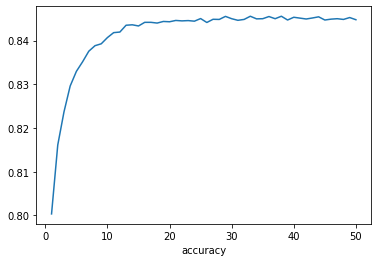

In [420]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel('Value of k for KNN')
plt.xlabel('accuracy')

We use k=33 which is least complex

### Train (k=33) (one hot encoding)

In [421]:
# instatiate the model
model = KNeighborsClassifier(n_neighbors=33, metric='minkowski', p=2 )

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.846 (0.006)
roc_auc: 0.899 (0.004)


### Test

In [422]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('KNN_ohe',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.845
AUC: 0.895
F1_Score: 0.663
Jaccard_Score: 0.496

Confusion Matrix:
 [[10414   943]
 [ 1398  2302]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     11357
           1       0.71      0.62      0.66      3700

    accuracy                           0.84     15057
   macro avg       0.80      0.77      0.78     15057
weighted avg       0.84      0.84      0.84     15057



### Train (k=33) (ordinal encoding)

In [423]:
# ordinal encoding preprocessing strategy

# instatiate the model
model = KNeighborsClassifier(n_neighbors=33, metric='minkowski', p=2 )

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.836 (0.005)
roc_auc: 0.887 (0.004)


### Test

In [424]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('KNN_ordinal',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.836
AUC: 0.887
F1_Score: 0.636
Jaccard_Score: 0.466

Confusion Matrix:
 [[10424   933]
 [ 1539  2161]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     11357
           1       0.70      0.58      0.64      3700

    accuracy                           0.84     15057
   macro avg       0.78      0.75      0.77     15057
weighted avg       0.83      0.84      0.83     15057



We observe that SVM ,Logistic and KNN give better accuracy with One Hot Encoding. Though variance is higher that ordinal.

## Naive Bayes

In [425]:
from sklearn.base import TransformerMixin , BaseEstimator
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

Naive Bayes  expects dense matrix

In [426]:
from sklearn.naive_bayes import GaussianNB


# instatiate the model
model = GaussianNB()

### Train (dense matrix) (one hot encoding)

In [427]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('to_dense', DenseTransformer()),('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.555 (0.009)
roc_auc: 0.860 (0.005)


Alternatively we could use ordinal Encoding as prprocessing strategy

### Test

In [428]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('NaiveBayes_ohe',clf,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Accuracy : 0.559
AUC: 0.857
F1_Score: 0.514
Jaccard_Score: 0.346

Confusion Matrix:
 [[4907 6450]
 [ 186 3514]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.43      0.60     11357
           1       0.35      0.95      0.51      3700

    accuracy                           0.56     15057
   macro avg       0.66      0.69      0.56     15057
weighted avg       0.81      0.56      0.58     15057



c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### Train (ordinal encoding)

In [429]:
# ordinal encoding preprocessing strategy

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.795 (0.005)
roc_auc: 0.851 (0.005)


### Test

In [430]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('NaiveBayes_ordinal',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.796
AUC: 0.850
F1_Score: 0.441
Jaccard_Score: 0.282

Confusion Matrix:
 [[10784   573]
 [ 2493  1207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88     11357
           1       0.68      0.33      0.44      3700

    accuracy                           0.80     15057
   macro avg       0.75      0.64      0.66     15057
weighted avg       0.78      0.80      0.77     15057



## Random Forest

In [431]:
from sklearn.ensemble import RandomForestClassifier
# instatiate the model
model = RandomForestClassifier()

### Train (one hot encoding)

In [432]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('to_dense', DenseTransformer()),('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.846 (0.005)
roc_auc: 0.893 (0.004)


### Test

In [433]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('RandomForestClassifier_ohe',clf,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https:/

Accuracy : 0.843
AUC: 0.891
F1_Score: 0.660
Jaccard_Score: 0.492

Confusion Matrix:
 [[10406   951]
 [ 1410  2290]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     11357
           1       0.71      0.62      0.66      3700

    accuracy                           0.84     15057
   macro avg       0.79      0.77      0.78     15057
weighted avg       0.84      0.84      0.84     15057



Alternatively we could use ordinal Encoding as prprocessing strategy

### Train (ordinal encoding)

In [434]:
# ordinal encoding preprocessing strategy

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.849 (0.004)
roc_auc: 0.895 (0.004)


### Test

In [435]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('RandomForestClassifier_ordinal',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.844
AUC: 0.893
F1_Score: 0.661
Jaccard_Score: 0.493

Confusion Matrix:
 [[10408   949]
 [ 1407  2293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     11357
           1       0.71      0.62      0.66      3700

    accuracy                           0.84     15057
   macro avg       0.79      0.77      0.78     15057
weighted avg       0.84      0.84      0.84     15057



We observe that GaussianNB and RandomForestClassifier give better accuracy with ordinal encoding strategy and variance is also less

## Decision Tree

In [436]:
from sklearn.tree import DecisionTreeClassifier
# instatiate the model
model = DecisionTreeClassifier()

### Train (one hot encoding)

In [437]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('to_dense', DenseTransformer()),('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.813 (0.005)
roc_auc: 0.769 (0.005)


### Test

In [438]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('DecisionTreeClassifier_ohe',clf,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Accuracy : 0.813
AUC: 0.770
F1_Score: 0.618
Jaccard_Score: 0.447

Confusion Matrix:
 [[9973 1384]
 [1429 2271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     11357
           1       0.62      0.61      0.62      3700

    accuracy                           0.81     15057
   macro avg       0.75      0.75      0.75     15057
weighted avg       0.81      0.81      0.81     15057



c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### Train (ordinal encoding)

In [439]:
# ordinal encoding preprocessing strategy

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.811 (0.006)
roc_auc: 0.765 (0.004)


### Test

In [440]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('DecisionTreeClassifier_ordinal',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.807
AUC: 0.761
F1_Score: 0.604
Jaccard_Score: 0.433

Confusion Matrix:
 [[9936 1421]
 [1483 2217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     11357
           1       0.61      0.60      0.60      3700

    accuracy                           0.81     15057
   macro avg       0.74      0.74      0.74     15057
weighted avg       0.81      0.81      0.81     15057



## Artificial Neural Network

In [441]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [442]:
def DL_Model(optimizer='adam',
                 dropout=0.1):
    model = Sequential()
    model.add(Dense(40,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,
    metrics=['accuracy'])
    return model

In [443]:
param_grid = {
    'm__epochs': [15,30,50],
    'm__batch_size':[100, 200, 300, 500]
}

In [444]:
model = KerasClassifier(build_fn= DL_Model, epochs= 5, batch_size=1024, verbose= 0)

### Train (one hot encoding)

In [445]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])

In [446]:
from sklearn.model_selection import GridSearchCV
ANN_cv = GridSearchCV(pipeline, param_grid,verbose=0,cv=3)
ANN_cv.fit(X,y)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_3/embedding_looku

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_13/dense_39/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_13/dense_39/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_13/dense_39/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_14/dense_42/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_14/de

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_26/dense_78/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_26/dense_78/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_26/dense_78/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_27/dense_81/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_27/de

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('col1',
                                                                         Pipeline(steps=[('ore',
                                                                                          OrdinalEncoder()),
                                                                                         ('ssc',
                                                                                          StandardScaler())]),
                                                                         ['country']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['workclass',
                                                                          'marital

In [447]:
print("tuned hpyerparameters :(best parameters) ",ANN_cv.best_params_)
print("accuracy :",ANN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'m__batch_size': 200, 'm__epochs': 50}
accuracy : 0.8541003266970316


### Test

In [448]:
t0 = time()
test_data_summary('ANN_ohe',ANN_cv,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.851
AUC: 0.907
F1_Score: 0.674
Jaccard_Score: 0.508

Confusion Matrix:
 [[10496   861]
 [ 1382  2318]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     11357
           1       0.73      0.63      0.67      3700

    accuracy                           0.85     15057
   macro avg       0.81      0.78      0.79     15057
weighted avg       0.85      0.85      0.85     15057



### Train (ordinal encoding)

In [449]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])

In [450]:
ANN_cv = GridSearchCV(pipeline, param_grid,verbose=0,cv=3)
ANN_cv.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep1',
                                        ColumnTransformer(transformers=[('col1',
                                                                         Pipeline(steps=[('ore',
                                                                                          OrdinalEncoder()),
                                                                                         ('ssc',
                                                                                          StandardScaler())]),
                                                                         ['workclass',
                                                                          'maritalstatus',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',

In [451]:
print("tuned hpyerparameters :(best parameters) ",ANN_cv.best_params_)
print("accuracy :",ANN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'m__batch_size': 100, 'm__epochs': 30}
accuracy : 0.8477640748023987


### Test

In [452]:
t0 = time()
test_data_summary('ANN_ordinal',ANN_cv,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.848
AUC: 0.904
F1_Score: 0.658
Jaccard_Score: 0.491

Confusion Matrix:
 [[10554   803]
 [ 1490  2210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     11357
           1       0.73      0.60      0.66      3700

    accuracy                           0.85     15057
   macro avg       0.80      0.76      0.78     15057
weighted avg       0.84      0.85      0.84     15057



## AdaBoost

In [453]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=40)

### Train (one hot encoding)

In [454]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('to_dense', DenseTransformer()),('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.856 (0.005)
roc_auc: 0.913 (0.003)


### Test

In [455]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('AdaBoostClassifier_ohe',clf,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https:/

Accuracy : 0.858
AUC: 0.912
F1_Score: 0.677
Jaccard_Score: 0.512

Confusion Matrix:
 [[10684   673]
 [ 1462  2238]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     11357
           1       0.77      0.60      0.68      3700

    accuracy                           0.86     15057
   macro avg       0.82      0.77      0.79     15057
weighted avg       0.85      0.86      0.85     15057



### Train (ordinal encoding)

In [456]:
# ordinal encoding preprocessing strategy

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.857 (0.005)
roc_auc: 0.913 (0.004)


### Test

In [457]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('AdaBoostClassifier_ordinal',clf,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.856
AUC: 0.911
F1_Score: 0.668
Jaccard_Score: 0.502

Confusion Matrix:
 [[10696   661]
 [ 1511  2189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     11357
           1       0.77      0.59      0.67      3700

    accuracy                           0.86     15057
   macro avg       0.82      0.77      0.79     15057
weighted avg       0.85      0.86      0.85     15057



## XGBClassifier

In [458]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)

### Train (one hot encoding)

In [459]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('to_dense', DenseTransformer()),('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.869 (0.003)
roc_auc: 0.927 (0.002)


### Test

In [460]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('XGBClassifier_ohe',clf,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.867
AUC: 0.926
F1_Score: 0.709
Jaccard_Score: 0.549

Confusion Matrix:
 [[10624   733]
 [ 1268  2432]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     11357
           1       0.77      0.66      0.71      3700

    accuracy                           0.87     15057
   macro avg       0.83      0.80      0.81     15057
weighted avg       0.86      0.87      0.86     15057



### Train (ordinal encoding)

In [461]:
# ordinal encoding preprocessing strategy

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.871 (0.003)
roc_auc: 0.926 (0.002)


### Test

In [462]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('XGBClassifier_ordinal',clf,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.867
AUC: 0.925
F1_Score: 0.710
Jaccard_Score: 0.550

Confusion Matrix:
 [[10600   757]
 [ 1248  2452]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     11357
           1       0.76      0.66      0.71      3700

    accuracy                           0.87     15057
   macro avg       0.83      0.80      0.81     15057
weighted avg       0.86      0.87      0.86     15057



In [463]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [464]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('to_dense', DenseTransformer()),('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.853 (0.005)
roc_auc: 0.909 (0.003)


## Summary

In [465]:
print_summary()

,Model,Accuracy,AUC,F1 Score,Jaccard Score,duration(secs)
0,SupportVectorMachine_ohe,0.843329,0.770503,0.663048,0.495940,339.951708
1,SupportVectorMachine_ordinal,0.841469,0.768815,0.659923,0.492452,307.951190
2,LogisticRegression_ohe,0.847513,0.902625,0.660757,0.493380,1.174859
3,LogisticRegression_ordinal,0.819752,0.848009,0.556101,0.385138,0.494679
4,KNN_ohe,0.844524,0.895403,0.662923,0.495800,104.273097
5,KNN_ordinal,0.835824,0.887259,0.636150,0.466436,45.474443
6,NaiveBayes_ohe,0.559275,0.856601,0.514344,0.346207,0.618347
7,NaiveBayes_ordinal,0.796374,0.850377,0.440511,0.282471,0.458773
8,RandomForestClassifier_ohe,0.843196,0.891301,0.659847,0.492367,10.979665
9,RandomForestClassifier_ordinal,0.843528,0.892551,0.660617,0.493224,6.171866


From the above summary we can shortlist 3 strategies based on scores and time taken for fit  
1) LogisticRegression_ohe  
2) AdaBoostClassifier_ohe  
3) XGBClassifier_ordinal  

We will further tune hyperparameters for the above 3 models/strategies

## Hyperparameter Tuning

In [466]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

### LogisticRegression Hyperparameter Tuning

The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:  
‘newton-cg’ - [‘l2’, ‘none’]  
‘lbfgs’ - [‘l2’, ‘none’]  
‘liblinear’ - [‘l1’, ‘l2’]  
‘sag’ - [‘l2’, ‘none’]  
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]  

In [467]:
# specify parameter values to search
params = {}
params['m__C'] = np.logspace(-3,3,7)
params['m__solver'] = ['liblinear','saga']
params['m__penalty'] = ['l1']

In [468]:
model=LogisticRegression()
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
logreg_cv=GridSearchCV(pipeline,params,cv=5)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear

tuned hpyerparameters :(best parameters)  {'m__C': 0.1, 'm__penalty': 'l1', 'm__solver': 'saga'}
accuracy : 0.8474655510971468


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [469]:
# specify parameter values to search
params = {}
params['m__C'] = np.logspace(-3,3,7)
params['m__solver'] = ['newton-cg','lbfgs','liblinear','sag','saga']
params['m__penalty'] = ['l2']

In [470]:
model=LogisticRegression()
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
logreg_cv=GridSearchCV(pipeline,params,cv=5)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array 

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ 

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs fa

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs fa

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

tuned hpyerparameters :(best parameters)  {'m__C': 0.1, 'm__penalty': 'l2', 'm__solver': 'sag'}
accuracy : 0.8475318970915074


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [471]:
t0 = time()
test_data_summary('Logistic_Tuned',logreg_cv,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.849
AUC: 0.903
F1_Score: 0.662
Jaccard_Score: 0.495

Confusion Matrix:
 [[10539   818]
 [ 1463  2237]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     11357
           1       0.73      0.60      0.66      3700

    accuracy                           0.85     15057
   macro avg       0.81      0.77      0.78     15057
weighted avg       0.84      0.85      0.84     15057



### AdaBoostClassifier Hyperparameter Tuning

In [472]:
# specify parameter values to search
params = {}
params['m__n_estimators'] = [90,100,150]
params['m__learning_rate'] = [0.5,1.0,1.2]
params['m__algorithm'] = ['SAMME','SAMME.R']

In [473]:
model=AdaBoostClassifier()
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
adaBoost_cv=GridSearchCV(pipeline,params,cv=5)
adaBoost_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",adaBoost_cv.best_params_)
print("accuracy :",adaBoost_cv.best_score_)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\

tuned hpyerparameters :(best parameters)  {'m__algorithm': 'SAMME.R', 'm__learning_rate': 1.2, 'm__n_estimators': 150}
accuracy : 0.8633892556250189


In [474]:
t0 = time()
test_data_summary('adaboost_Tuned',adaBoost_cv,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.863
AUC: 0.920
F1_Score: 0.695
Jaccard_Score: 0.532

Confusion Matrix:
 [[10630   727]
 [ 1343  2357]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     11357
           1       0.76      0.64      0.69      3700

    accuracy                           0.86     15057
   macro avg       0.83      0.79      0.80     15057
weighted avg       0.86      0.86      0.86     15057



### XGBClassifier Hyperparameter Tuning

In [475]:
# specify parameter values to search
params = {}
params['m__max_depth'] = [6,8,10]
params['m__learning_rate'] = [0.1,0.3,0.4]
params['m__min_child_weight'] = [1,2,3]
params['m__gamma'] = [0,1,2]
params['m__subsample'] = [1,2,3]
params['m__colsample_bytree'] = [1,2]
params['m__reg_alpha'] = [0,1e-5, 1e-2, 0.1]

In [476]:
from sklearn.model_selection import RandomizedSearchCV
model=XGBClassifier()
pipeline = Pipeline(steps=[('prep1',preprocessing1), ('m', model)])
XGBoost_cv=RandomizedSearchCV(pipeline,params,cv=5, random_state=0)
XGBoost_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",XGBoost_cv.best_params_)
print("accuracy :",XGBoost_cv.best_score_)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[01:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[01:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[01:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[01:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[01:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[01:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
tuned hpyerparameters :(best parameters)  {'m__subsample': 1, 'm__reg_alpha': 0, 'm__min_child_weight': 1, 'm__max_depth': 8, 'm__learning_rate': 0.1, 'm__gamma': 2, 'm__colsample_bytree': 1}
accuracy : 0.8695594606163113


In [477]:
t0 = time()
test_data_summary('XGBoost_Tuned',XGBoost_cv,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.868
AUC: 0.925
F1_Score: 0.710
Jaccard_Score: 0.550

Confusion Matrix:
 [[10632   725]
 [ 1265  2435]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     11357
           1       0.77      0.66      0.71      3700

    accuracy                           0.87     15057
   macro avg       0.83      0.80      0.81     15057
weighted avg       0.86      0.87      0.86     15057



In [479]:
#XGBoost_Tuned_OHE
pipeline = Pipeline(steps=[('prep',preprocessing), ('m', model)])
XGBoost_cv=RandomizedSearchCV(pipeline,params,cv=5, random_state=0)
XGBoost_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",XGBoost_cv.best_params_)
print("accuracy :",XGBoost_cv.best_score_)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[11:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[11:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[11:16:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[11:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[11:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[11:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
tuned hpyerparameters :(best parameters)  {'m__subsample': 1, 'm__reg_alpha': 0, 'm__min_child_weight': 1, 'm__max_depth': 8, 'm__learning_rate': 0.1, 'm__gamma': 2, 'm__colsample_bytree': 1}
accuracy : 0.8689623741828232


In [480]:
t0 = time()
test_data_summary('XGBoost_Tuned_ohe',XGBoost_cv,X_test,y_test)
duration.append(time() - t0)

Accuracy : 0.870
AUC: 0.927
F1_Score: 0.712
Jaccard_Score: 0.553

Confusion Matrix:
 [[10673   684]
 [ 1277  2423]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     11357
           1       0.78      0.65      0.71      3700

    accuracy                           0.87     15057
   macro avg       0.84      0.80      0.81     15057
weighted avg       0.87      0.87      0.87     15057



## Final Summary

In [491]:
print_summary()

,Model,Accuracy,AUC,F1 Score,Jaccard Score,duration(secs)
21,XGBoost_Tuned_ohe,0.869762,0.926511,0.711914,0.552692,0.430370
20,XGBoost_Tuned,0.867836,0.925365,0.709913,0.550282,0.372003
16,XGBClassifier_ohe,0.867105,0.925503,0.708521,0.548613,6.011934
17,XGBClassifier_ordinal,0.866839,0.925274,0.709799,0.550146,3.257293
19,adaboost_Tuned,0.862522,0.919728,0.694870,0.532415,2.112357
14,AdaBoostClassifier_ohe,0.858205,0.912451,0.677053,0.511777,3.771081
15,AdaBoostClassifier_ordinal,0.855748,0.911499,0.668397,0.501949,2.312823
12,ANN_ohe,0.851033,0.907264,0.673935,0.508222,1.687187
18,Logistic_Tuned,0.848509,0.902708,0.662324,0.495131,0.313164
13,ANN_ordinal,0.847712,0.903895,0.658424,0.490784,0.802746


*  The winning strategy based on accuracy,AUC and speed of fit is XGBClassifier from xgboost library with a one hot encoding preprocessing strategy.  
*  The close contenders were AdaBoostClassifier from sklearn.ensemble and ANN from keras.models library both with a one hot encoding preprocessing strategy.  

In [488]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

In [492]:
model = BaggingClassifier(
    AdaBoostClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

In [493]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',preprocessing), ('to_dense', DenseTransformer()),('m', model)])
scores_acc = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_roc = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)

# summarize the model performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_acc), std(scores_acc)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_roc), std(scores_roc)))

Accuracy: 0.848 (0.003)
roc_auc: 0.904 (0.004)


In [490]:
t0 = time()
clf = pipeline.fit(X,y.values.ravel())
test_data_summary('BaggingClassifier_ohe',clf,X_test,y_test)
duration.append(time() - t0)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https:/

Accuracy : 0.847
AUC: 0.900
F1_Score: 0.643
Jaccard_Score: 0.474

Confusion Matrix:
 [[10670   687]
 [ 1620  2080]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     11357
           1       0.75      0.56      0.64      3700

    accuracy                           0.85     15057
   macro avg       0.81      0.75      0.77     15057
weighted avg       0.84      0.85      0.84     15057

